# LA County COVID-19 Cases by Neighborhoods

Use LA County's [countywide statistical areas](http://geohub.lacity.org/datasets/lacounty::countywide-statistical-areas-csa) and look at trends in cases and new cases by neighborhood.

**Related daily reports:** 
1. **[US counties report on cases and deaths for select major cities](https://cityoflosangeles.github.io/covid19-indicators/us-county-trends.html)**
1. **[CA counties report on cases, deaths, and hospitalizations](https://cityoflosangeles.github.io/covid19-indicators/ca-county-trends.html)**
1. **[Los Angeles County, detailed indicators](https://cityoflosangeles.github.io/covid19-indicators/coronavirus-stats.html)**

Code available in GitHub: [https://github.com/CityOfLosAngeles/covid19-indicators](https://github.com/CityOfLosAngeles/covid19-indicators)
<br>
Get informed with [public health research](https://github.com/CityOfLosAngeles/covid19-indicators/blob/master/reopening-sources.md)

In [1]:
import pandas as pd

import default_parameters
import make_charts
import neighborhood_charts

from datetime import date
from IPython.display import Markdown, HTML

# Default parameters
start_date = default_parameters.start_date
today_date = default_parameters.today_date

fulldate_format = default_parameters.fulldate_format

start_date = date(2020, 4, 1)

In [2]:
la_neighborhoods = neighborhood_charts.la_neighborhoods
unincorporated_neighborhoods = neighborhood_charts.unincorporated_neighborhoods
incorporated_neighborhoods = neighborhood_charts.incorporated_neighborhoods

df = neighborhood_charts.prep_data(start_date)

data_through = df.date.max()
neighborhoods = list(df.aggregate_region.unique())

In [ ]:
display(Markdown(
        f"Report updated: {default_parameters.today_date.strftime(fulldate_format)}; "
        f"data available through {data_through.strftime(fulldate_format)}."
    )
)

<strong><span style='color:f"#515252"'>The 25th and 75th percentile of cases and cases per 100k are calculated each day and drawn in gray.</span></strong>

<strong><span style='color:#1696D2'>The neighborhood's own trend is drawn in blue.</span></strong>

The percentiles provide context to whether a neighborhood's cases are relatively high or lower compared to other parts of the county. Data from the past 2 weeks are shaded in gray.

**Note:** Some neighborhoods report cases, but do not have population data. Rankings are calculated using cases per 100k to normalize across population differences. Neighborhoods without population data are excluded from the rankings.
Also, since rolling averages are used, decimals are possible, and are rounded to 1 decimal place. 

In [ ]:
"""
References
https://stackoverflow.com/questions/35160256/how-do-i-output-lists-as-a-table-in-jupyter-notebook
https://stackovearflow.com/questions/7572901/python-html-combine-multiple-htmls-into-one
"""

<a id='top'></a>

## Neighborhoods by Group:
Select neighborhoods within the City of LA, other incorporated cities in LA County, and unincorporated areas in LA County.

In [3]:
for list_name in [la_neighborhoods, unincorporated_neighborhoods, incorporated_neighborhoods]:
    combined_html = ""
    for i, name in enumerate(list_name):
        new_name = name.replace(" ", "-")
        if i < len(list_name)-1:
            name_html = f"<a href=#{new_name}>{name}, </a>"
            combined_html += name_html

        elif i == len(list_name)-1:
            name_html = f"<a href=#{new_name}>{name}</a>"
            combined_html += name_html
    
    if list_name == la_neighborhoods:
        group_title = "City of LA: "
    elif list_name == incorporated_neighborhoods:
        group_title = "LA County - Incorporated Cities: "
    elif list_name == unincorporated_neighborhoods:
        group_title = "LA County - Unincorporated: "

    display(Markdown(f"<strong>{group_title}</strong>"))
    display(HTML(combined_html))

<strong>City of LA: </strong>

<strong>LA County - Unincorporated: </strong>

<strong>LA County - Incorporated Cities: </strong>

#### Hacienda Heights (Unincorporated)

Cumulative cases reported in Hacienda Heights: 1,166 cases a month ago; 1,282 cases 2 weeks ago; 1,387 cases 1 week ago; 1,498 cases yesterday. This translates to a <strong>8.0% </strong> change in the past week. Of those tested so far, 11.0% tested positive, with persons testing positive at a rate of 25.97 per 1k. As of 11/24/20, Hacienda Heights ranked <strong> 93 out of 167 </strong> neighborhoods on cases per 100k <i>(1 being the most severely hit)</i>.

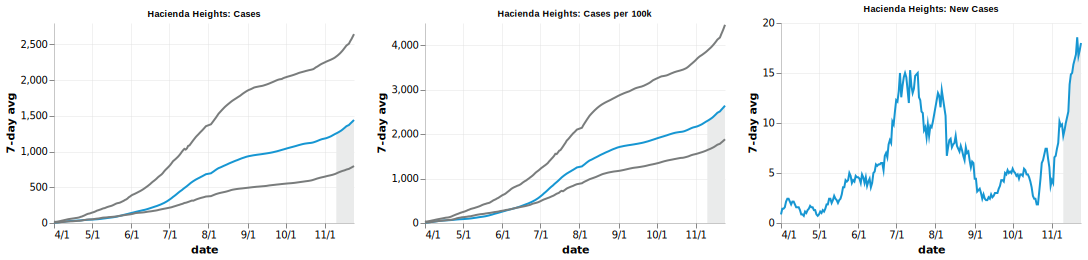

#### Alhambra (Incorporated)

Cumulative cases reported in Alhambra: 1,422 cases a month ago; 1,514 cases 2 weeks ago; 1,610 cases 1 week ago; 1,754 cases yesterday. This translates to a <strong>8.9% </strong> change in the past week. Of those tested so far, 6.7% tested positive, with persons testing positive at a rate of 19.88 per 1k. As of 11/24/20, Alhambra ranked <strong> 121 out of 167 </strong> neighborhoods on cases per 100k <i>(1 being the most severely hit)</i>.

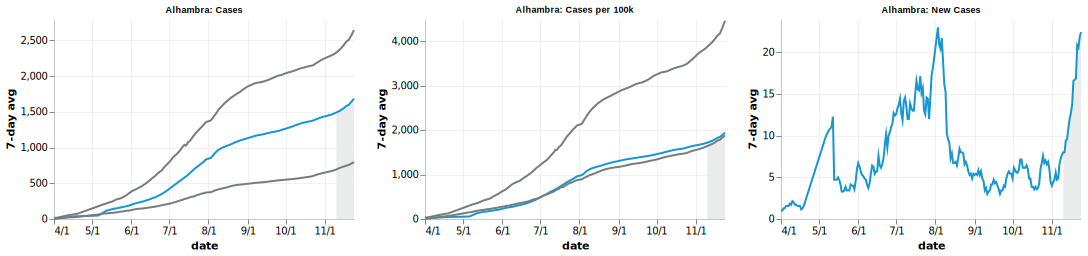

#### Brentwood (City of LA)

Cumulative cases reported in Brentwood: 584 cases a month ago; 661 cases 2 weeks ago; 718 cases 1 week ago; 788 cases yesterday. This translates to a <strong>9.7% </strong> change in the past week. Of those tested so far, 2.9% tested positive, with persons testing positive at a rate of 12.83 per 1k. As of 11/24/20, Brentwood ranked <strong> 143 out of 167 </strong> neighborhoods on cases per 100k <i>(1 being the most severely hit)</i>.

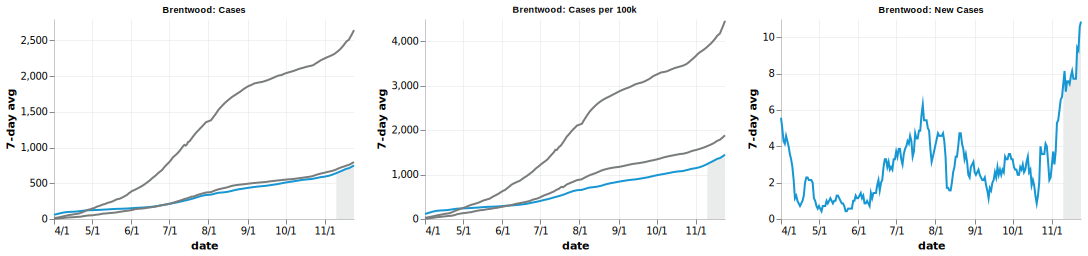

In [4]:
for c in neighborhoods:
    HTML(f"<a id={c}></a>")
    neighborhood_charts.make_chart(df, c)
    display(HTML(
        "<br>"
        "<a href=#top>Return to top</a><br>"
    ))